0.03875155938329442


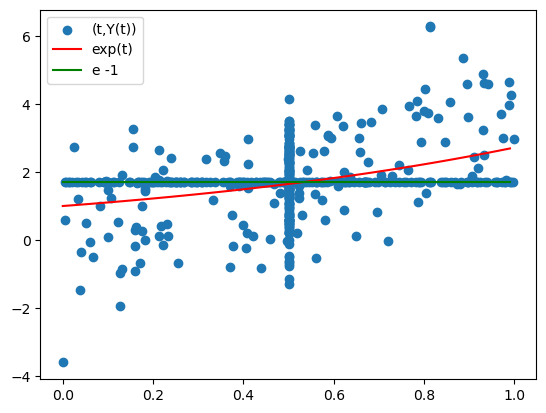

In [245]:
from random import random as U
from math import exp
import matplotlib.pyplot as plt
import numpy as np

def H(x): return 0 if x<0 else 1

points = []
def Y(t):
    sol = exp(1)-1 
    l = 2
    if U()*l<1:
        S = U()
        sol+= l*Y(S)*(H(t-S)+ S -1) 
    global points
    points += [(t,sol)]
    return sol

def sol(t,nsim): return sum(Y(t) for _ in range(nsim))/nsim

print((sol(0.5,3*10**2)-exp(0.5))/exp(0.5))
ll = np.arange(0,1,0.01)
pp = np.exp(ll)
qq= [exp(1)-1 for _ in ll]

x,y = zip(*points)
plt.scatter(x,y, label= "(t,Y(t))")
#plt.ylim(-3,6)
plt.plot(ll,pp,color ="red",label = "exp(t)")
plt.plot(ll,qq,color ="green", label="e -1")
plt.legend()
plt.savefig("../../latex/main paper/plots/ydy int.png",dpi=300)
plt.show()

